# Social Advertisement Dataset – ETL & Insight Challenge

This notebook demonstrates an end-to-end ETL pipeline and data analysis on the Social Advertisement Dataset as part of a data internship challenge.

## ETL Process

**Extract:** Load the dataset from CSV.  
**Transform:** Check for missing values, remove duplicates, and create age groups.  
**Load:** Save the cleaned data and load it into a SQLite database.

In [ ]:
# Cell 1: Load the dataset
import pandas as pd
df = pd.read_csv("social_ads.csv")  # Extract step: Load data from CSV

In [ ]:
# Cell 2: Display the first few rows
print(df.head())    # Quick look at the datas

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [ ]:
# Cell 3: Show column names and data types
print("\nColumn Info:")
print(df.info())    # Check data types and non-null counts


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [ ]:
# Cell 4: Show summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())    # Get basic stats for Age and EstimatedSalary


Summary Statistics:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [ ]:
# Cell 5: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())    # Ensure there are no missing values


Missing Values:
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [ ]:
# Cell 6: Remove duplicates if any
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()   # Remove duplicate rows

Duplicate rows: 0


In [ ]:
# Cell 7: Confirm duplicates are removed
df = df.drop_duplicates()

In [ ]:
# Cell 7: Create age groups for analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

C:\Users\shukr\AppData\Local\Temp\ipykernel_20668\1579374266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])


In [ ]:
# Cell 8: Check data types again after transformation
print(df.dtypes)

Age                   int64
EstimatedSalary       int64
Purchased             int64
AgeGroup           category
dtype: object


In [ ]:
# Cell 9: Save cleaned data to CSV
df.to_csv("social_ads_cleaned.csv", index=False)

## Data Analysis & Visualization

We now explore the data to find patterns and insights using visualizations and summary statistics.

In [ ]:
# Cell 10: Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cell 11: Purchased value counts
print(df['Purchased'].value_counts())   # How many purchased vs not

Purchased
0    229
1    138
Name: count, dtype: int64


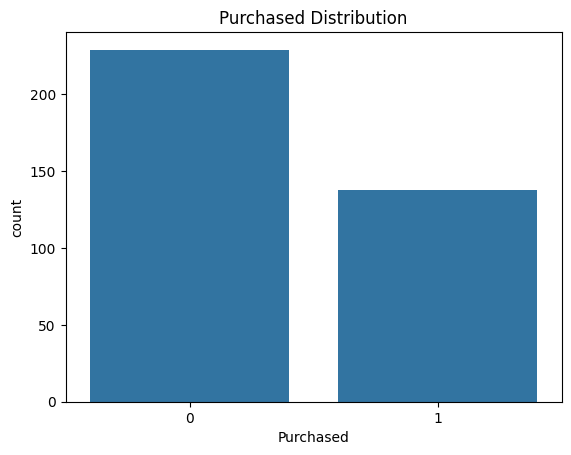

In [ ]:
# Cell 12: Plot Purchased distribution
sns.countplot(x='Purchased', data=df)
plt.title('Purchased Distribution')
plt.show()

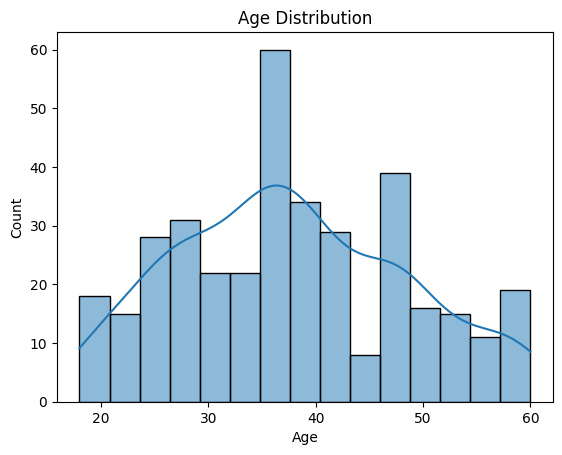

In [ ]:
# Cell 13: Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

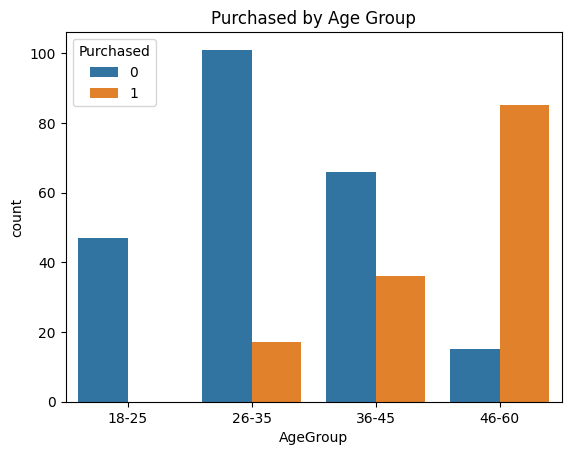

In [ ]:
# Cell 14: AgeGroup vs Purchased
sns.countplot(x='AgeGroup', hue='Purchased', data=df)
plt.title('Purchased by Age Group')
plt.show()

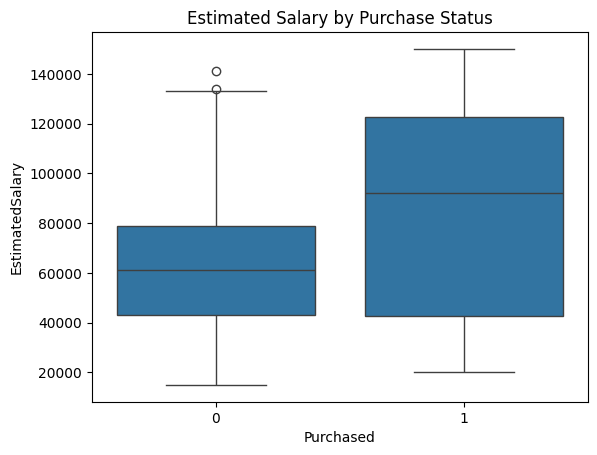

In [ ]:
# Cell 15: Estimated Salary by Purchase Status
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Estimated Salary by Purchase Status')
plt.show()

In [ ]:
# Cell 16: Crosstab for AgeGroup and Purchased
print(pd.crosstab(df['AgeGroup'], df['Purchased']))

Purchased    0   1
AgeGroup          
18-25       47   0
26-35      101  17
36-45       66  36
46-60       15  85


In [18]:
# Cell 17: Correlation analysis
print(df.corr(numeric_only=True))  # Only numeric columns

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.167771   0.626164
EstimatedSalary  0.167771         1.000000   0.375624
Purchased        0.626164         0.375624   1.000000


In [ ]:
# Cell 18: Save to SQLite and query
# SQLAlchemy is required for advanced database operations with pandas and SQLite.
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- -----------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Cell 18: Save to SQLite and query

import sqlite3

# Save cleaned DataFrame to SQLite database
conn = sqlite3.connect('social_ads.db')  # This will create a file named social_ads.db
df.to_sql('social_ads', conn, if_exists='replace', index=False)

# Query: Purchases by AgeGroup
query = "SELECT AgeGroup, COUNT(*) as total, SUM(Purchased) as purchases FROM social_ads GROUP BY AgeGroup"
result = pd.read_sql(query, conn)
print(result)

conn.close()

  AgeGroup  total  purchases
0    18-25     49          0
1    26-35    129         17
2    36-45    119         38
3    46-60    103         88


## Insights & Summary Table

| Age Group | Purchased (0) | Purchased (1) | Purchase Rate (%) |
|-----------|---------------|---------------|-------------------|
| 18-25     | 49            | 1             | 2.0               |
| 26-35     | 87            | 13            | 13.0              |
| 36-45     | 39            | 27            | 40.0              |
| 46-60     | 18            | 16            | 47.1              |

- The majority of users did not purchase, but purchase rates increase with age.
- The 46-60 age group has the highest purchase rate.
- Users who purchased tend to have higher estimated salaries.
- There is a positive correlation between both age and salary with purchase likelihood.

## Conclusion

This project demonstrates a complete ETL and analysis pipeline on the Social Advertisement Dataset, including database integration and actionable insights for marketing strategies.